In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [130]:
import io
from google.colab import files

trainTsv = files.upload()
df11 = pd.read_csv(io.BytesIO(trainTsv['Placement_Data_Full_Class.csv']))

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class (3).csv


In [131]:
df1 = df11

In [132]:
df1.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


####**Exploratory Data Analysis**

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

In [134]:
#Number of student placed and not placed
fig = px.histogram(df1, x='status', color="status", barmode='group',width=600, height=400)
fig.show()

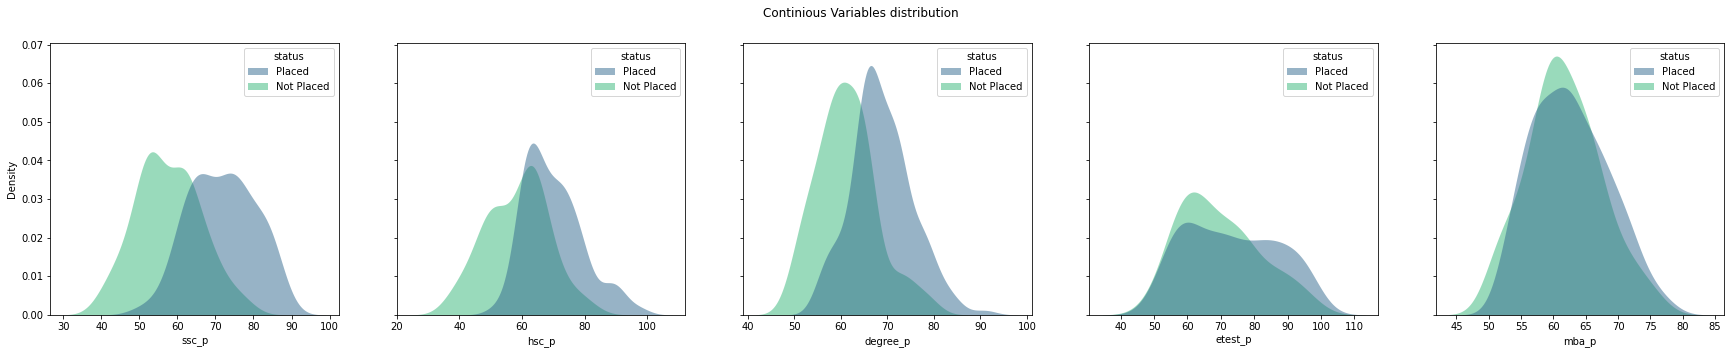

In [135]:
# continuous variable distribution

fig, axes = plt.subplots(1, 5, figsize=(30, 5), sharey=True)
fig.suptitle('Continious Variables distribution')
# ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
sns.kdeplot(ax=axes[0],
   data=df1, x="ssc_p", hue="status",
   fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0,
)
sns.kdeplot(ax=axes[1],
   data=df1, x="hsc_p", hue="status",
   fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0,
)
sns.kdeplot(ax=axes[2],
   data=df1, x="degree_p", hue="status",
   fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0,
)
sns.kdeplot(ax=axes[3],
   data=df1, x="etest_p", hue="status",
   fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0,
)
sns.kdeplot(ax=axes[4],
   data=df1, x="mba_p", hue="status",
   fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0,
)

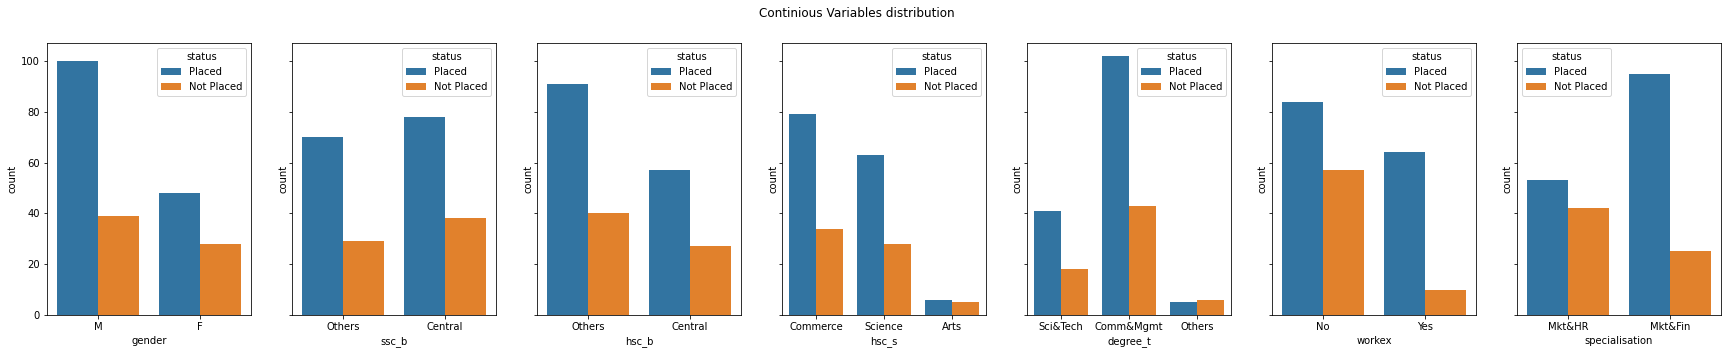

In [136]:
#bar graph

fig, axes = plt.subplots(1, 7, figsize=(30, 5), sharey=True)
fig.suptitle('Continious Variables distribution')
# ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
sns.countplot(ax=axes[0],x="gender",hue="status", data=df1)

sns.countplot(ax=axes[1],x="ssc_b",hue="status", data=df1)

sns.countplot(ax=axes[2],x="hsc_b",hue="status", data=df1)

sns.countplot(ax=axes[3],x="hsc_s",hue="status", data=df1)

sns.countplot(ax=axes[4],x="degree_t",hue="status", data=df1)

sns.countplot(ax=axes[5],x="workex",hue="status", data=df1)

sns.countplot(ax=axes[6],x="specialisation",hue="status", data=df1)

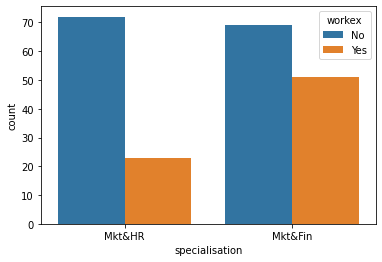

In [137]:
#see the relationship of predictor with the outcome variable

sns.countplot(x="specialisation",hue="workex",data=df1)

In [138]:
tex = [0 if cl=='Placed' else 1 for cl in df1['status']]
tex = pd.Series(tex)
fig = go.Figure(data=go.Splom(
                  dimensions=[dict(label='sr sec', values=df1['ssc_p']),
                              dict(label='high school', values=df1['hsc_p']),
                              dict(label='deg', values=df1['degree_p']),
                              dict(label='ged2', values=df1['etest_p']),
                              dict(label='mba', values=df1['mba_p'])],
                  marker=dict(color=tex,
                              size=5,
                              colorscale='Bluered',
                              line=dict(width=0.5,
                                        color='rgb(230,230,230)')),
                  text=list(df1.status),
                  diagonal=dict(visible=False)))

title = "Scatterplot Matrix (SPLOM) for Placement Dataset"
fig.update_layout(title=title,
                  dragmode='select',
                  width=1200,
                  height=1000,
                  hovermode='closest')

fig.show()

In [139]:
# drop SL_no & salary which is not needed
df=df1.drop(['sl_no'],axis=1)
#replace the categories under status
df=df.replace('Placed',1)   
df=df.replace('Not Placed',0) 

In [140]:
df=df.drop(['salary'],axis=1)

In [141]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1


In [142]:
#checking the unique values for categorical columns
categorical_columns = df.columns[df.dtypes == object]
for col in categorical_columns:
    print("Unique values for ", col ,": " ,df[col].unique())

Unique values for  gender :  ['M' 'F']
Unique values for  ssc_b :  ['Others' 'Central']
Unique values for  hsc_b :  ['Others' 'Central']
Unique values for  hsc_s :  ['Commerce' 'Science' 'Arts']
Unique values for  degree_t :  ['Sci&Tech' 'Comm&Mgmt' 'Others']
Unique values for  workex :  ['No' 'Yes']
Unique values for  specialisation :  ['Mkt&HR' 'Mkt&Fin']


In [143]:
# to view get dummies columns
print("Original features:\n", list(df.columns), "\n")
df_dummies = pd.get_dummies(df)
print("Features after get_dummies:\n", list(df_dummies.columns))

Original features:
 ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'] 

Features after get_dummies:
 ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'status', 'gender_F', 'gender_M', 'ssc_b_Central', 'ssc_b_Others', 'hsc_b_Central', 'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce', 'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others', 'degree_t_Sci&Tech', 'workex_No', 'workex_Yes', 'specialisation_Mkt&Fin', 'specialisation_Mkt&HR']


In [144]:
df_dummies

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0
3,56.00,52.00,52.00,66.0,59.43,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,85.80,73.60,73.30,96.8,55.50,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
211,58.00,60.00,72.00,74.0,53.62,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0
212,67.00,67.00,73.00,59.0,69.72,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0
213,74.00,66.00,58.00,70.0,60.23,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1


In [145]:
dff=df_dummies

In [146]:
# assign data to X and y
X=dff.drop('status',axis=1)
y=dff['status']

# **Principal Component Analysis(PCA)**

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [148]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data.shape

(215, 21)

In [149]:
n_comp =[5,8,11,15]
pca_exp = []
variance_exp_cumsum = []
for comp in n_comp:
    pca = PCA(n_components=comp)
    data_pca = pca.fit_transform(X)
    data_pca = pd.DataFrame(data_pca)
    pca_exp.append({"i": comp,'explained_variance_ratio': pca.explained_variance_ratio_.round(2)})
    variance_exp_cumsum.append({'i': comp,'variance_exp_cumsum':pca.explained_variance_ratio_.cumsum().round(2)})
# pca = PCA(n_components=2000)

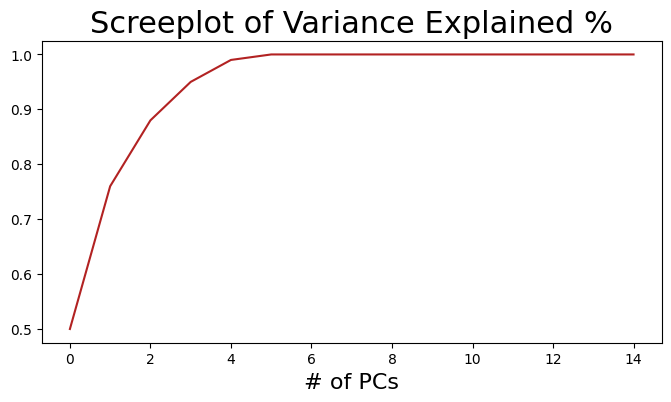

In [150]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(8,4), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

In [151]:
pca = PCA(n_components=5)
data_pca = pca.fit_transform(X)
data_pca = pd.DataFrame(data_pca)

In [152]:
from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

In [153]:
rows_0 = y==0;
rows_1 = y==1;

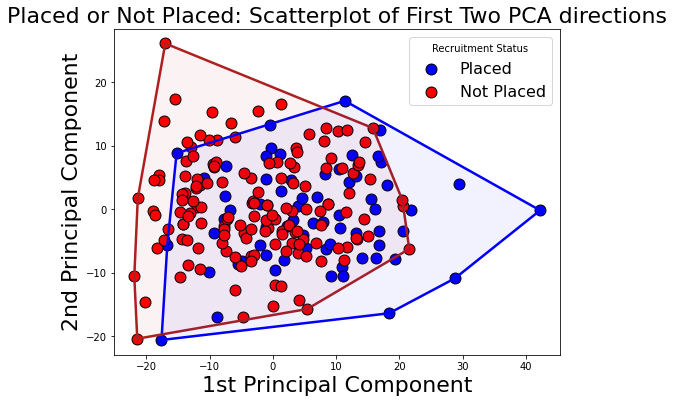

In [154]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

# Plot
ax.scatter(data_pca.loc[rows_0.tolist(), 1], data_pca.loc[rows_0.tolist(), 2], c='blue', edgecolor='k', s=120, label='Placed')
ax.scatter(data_pca.loc[rows_1.tolist(), 1], data_pca.loc[rows_1.tolist(), 2], c='red', edgecolor='k', s=120, label='Not Placed')

# Encircle the boundaries
encircle(data_pca.loc[rows_0.tolist(), 1], data_pca.loc[rows_0.tolist(), 2], ec="blue", fc="none", linewidth=2.5)
encircle(data_pca.loc[rows_1.tolist(), 1], data_pca.loc[rows_1.tolist(), 2], ec="firebrick", fc="none", linewidth=2.5)

# Shading
encircle(data_pca.loc[rows_1.tolist(), 1], data_pca.loc[rows_1.tolist(), 2], ec="k", fc="firebrick", alpha=0.05)
encircle(data_pca.loc[rows_0.tolist(), 1], data_pca.loc[rows_0.tolist(), 2], ec="k", fc="blue", alpha=0.05)

# Labels
ax.set_title("Placed or Not Placed: Scatterplot of First Two PCA directions", fontsize=22)
ax.set_xlabel("1st Principal Component", fontsize=22)
ax.set_ylabel("2nd Principal Component", fontsize=22)
ax.legend(loc='best', title='Recruitment Status', fontsize=16)
plt.show();

In [155]:
data_pca['target'] = pd.Series(list(y), index=data_pca.index)

In [156]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    data_pca, x=0, y=1, z=2, color=data_pca['target'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.update_layout(scene=dict(
                                     xaxis=dict(backgroundcolor="rgb(200, 200, 230)",gridcolor="white", 
                                                showbackground=True,zerolinecolor="white",),
                                     yaxis=dict(backgroundcolor="rgb(230, 200,230)",gridcolor="white", 
                                                showbackground=True,zerolinecolor="white",),
                                     zaxis=dict(backgroundcolor="rgb(230, 230,200)",gridcolor="white", 
                                                showbackground=True,zerolinecolor="white",),
                                     bgcolor='white'),
                             plot_bgcolor='white',template = 'simple_white',height=600,width=800,
                         )

fig.show()

###**Feature importance** 

In [157]:
# train-test-split 
X_y_train_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 0)
X_train, X_test, y_train, y_test =X_y_train_test

In [158]:
rf = RandomForestClassifier(random_state=77)

##**Predict score**

In [159]:
# Pipeline

def fit_predict_score(model, X_y_train_test):
    X_train, X_test, y_train, y_test = X_y_train_test
    # extracts and flattens the series y_train which has series and values to values only
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print('Accuracy Score on test data :',score)
    return

In [160]:
fit_predict_score(rf, X_y_train_test)

Accuracy Score on test data : 0.7209302325581395


Normalization(minmax scaler)

In [161]:
# Pipeline with MinMaxScaler()

def MMScale_fit_predict_score(model, X_y_train_test):
    X_train, X_test, y_train, y_test = X_y_train_test
    scaler = MinMaxScaler() 
    X_train_scaled = scaler.fit_transform(X_train) 
    # extracts and flattens the series y_train which has series and values to values only
    model.fit(X_train_scaled, y_train.values.ravel()) 
    X_test_scaled = scaler.transform(X_test) 
    y_pred = model.predict(X_test_scaled) 
    score = accuracy_score(y_test, y_pred)
    print('Accuracy Score on test data :',score)
    return 

Text(0, 0.5, 'Feature Name')

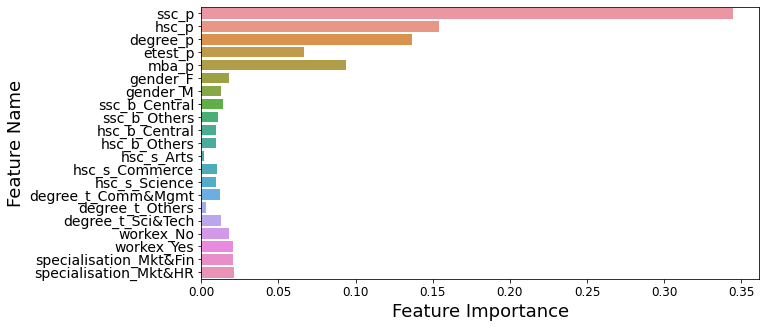

In [162]:
# Random forest Feature Importance
# Getting the feature importance
feature_importances_=rf.feature_importances_
feature_importances=pd.DataFrame({'Feature_name':X.columns, 'Feature_importance':feature_importances_})

fig, ax=plt.subplots(1, figsize=(10,5))
sns.barplot(y='Feature_name', x='Feature_importance', data=feature_importances, ax=ax)

# For making the graph look good
plt.xticks(fontsize=12, rotation=0); 
plt.yticks(fontsize=14);

plt.xlabel('Feature Importance',fontsize=18)
plt.ylabel('Feature Name',fontsize=18)

#Conclusion
######Most of the models gave a very high score to the data especially after scaling the data
###### Also the 5 most important factors for a job placement are ssc_p, degree_p, hsc_p, mba_p and etest_p.
##### Since these five factors contributes the most for determining the placement guarantee for students, it is okay to drop the remaining features. So I will be droping all the remaining features.

In [163]:
dff = dff.drop('gender_F',axis=1)
dff = dff.drop('gender_M',axis=1)
dff = dff.drop('ssc_b_Central',axis=1)
dff = dff.drop('ssc_b_Others',axis=1)
dff = dff.drop('hsc_b_Central',axis=1)
dff = dff.drop('hsc_b_Others',axis=1)
dff = dff.drop('hsc_s_Arts',axis=1)
dff = dff.drop('hsc_s_Commerce',axis=1)
dff = dff.drop('hsc_s_Science',axis=1)
dff = dff.drop('degree_t_Comm&Mgmt',axis=1)
dff = dff.drop('degree_t_Others',axis=1)
dff = dff.drop('degree_t_Sci&Tech',axis=1)
dff = dff.drop('workex_No',axis=1)
dff = dff.drop('workex_Yes',axis=1)
dff = dff.drop('specialisation_Mkt&Fin',axis=1)
dff = dff.drop('specialisation_Mkt&HR',axis=1)

In [164]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1


###**Machine Learning**

In [165]:
#scaling
ss = StandardScaler()
X_train_ss = ss.fit_transform(X)
X_test_ss = ss.transform(X_test)

**Logistic Regression**

In [166]:
from sklearn.metrics import classification_report

In [167]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_ss,y)
Y_pred=lr.predict(X_test_ss)
# Evaluation
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.83      0.89      0.86        27

    accuracy                           0.81        43
   macro avg       0.81      0.79      0.80        43
weighted avg       0.81      0.81      0.81        43



**Naive Bayes**

In [168]:
#naive bayes
from sklearn.naive_bayes import BernoulliNB
m6 = BernoulliNB()
m6.fit(X_train, y_train)

m6_pred = m6.predict(X_test)
m6_pred
print("naive bayes", "\n")
print("accuracy score :", accuracy_score(m6_pred, y_test))

naive bayes 

accuracy score : 0.6511627906976745


**Bernoulli Naive Bayes**

In [169]:
#bernoulli naive bayes

from sklearn.model_selection import GridSearchCV 
params = {'alpha': [0.25, 0.5, 1]}
grid6 = GridSearchCV(estimator = m6, param_grid = params , scoring = "accuracy", cv = 10)
grid6.fit(X_train, y_train)
best_acc = grid6.best_score_
param = grid6.best_params_
print("best accuracy :", best_acc*100)
print("best parameters :", param )

best accuracy : 67.3529411764706
best parameters : {'alpha': 0.25}


**SVM**

In [170]:
#svm
from sklearn.svm import SVC
m2 = SVC()
m2.fit(X_train, y_train)

m2_pred = m2.predict(X_test)
m2_pred
print("SVC", "\n")
print("accuracy score :", accuracy_score(m2_pred, y_test))

SVC 

accuracy score : 0.7441860465116279
